In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

### HW2 3a

In [3]:
DIR = '/nfs/spare11/env315/data/'
filename = 'era5_u1060_daily_1980-2019.nc'
datafile = DIR+filename
data = xr.open_mfdataset(datafile,combine='by_coords').compute()
data = data.u_component_of_wind
data

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([33.964096, 37.398537, 38.92926 , ..., 41.941204, 40.91121 ,
       41.22743 ], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...

In [5]:
u_winter = data.sel(time=data.time.dt.month.isin([1,2,3,11,12]))
u_winter

<xarray.DataArray 'u_component_of_wind' (time: 6050)> Size: 24kB
array([33.964096, 37.398537, 38.92926 , ..., 41.941204, 40.91121 ,
       41.22743 ], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 48kB 1980-01-01T09:00:00 ... 2019-12-31T09...

In [6]:
# Method 1 using numpy array functions
u_winter_mean = np.mean(u_winter.values)
print('mean: ',u_winter_mean)

u_winter_std = np.std(u_winter.values)
print('std: ',u_winter_std)

u_winter_median = np.quantile(u_winter.values,0.5)
print('median: ',u_winter_median)

u_winter_q25 = np.quantile(u_winter.values,0.25)
print('Q1: ',u_winter_q25)

u_winter_q75 = np.quantile(u_winter.values,0.75)
print('Q3: ',u_winter_q75)

mean:  25.943623
std:  16.921993
median:  26.896006
Q1:  14.400373
Q3:  38.078053


In [7]:
# Method 2 using xarray functions
u_winter_mean = u_winter.mean(dim='time')
print('mean: ',u_winter_mean.values)

u_winter_std = u_winter.std(dim='time')
print('std: ',u_winter_std.values)

u_winter_median = u_winter.quantile(0.5)
print('median: ',u_winter_median.values)

u_winter_q25 = u_winter.quantile(0.25)
print('Q1: ',u_winter_q25.values)

u_winter_q75 = u_winter.quantile(0.75)
print('Q3: ',u_winter_q75.values)

mean:  25.943623
std:  16.921993
median:  26.896005630493164
Q1:  14.400373220443726
Q3:  38.07805156707764


### HW2 3b

In [8]:
u_1986 = u_winter.sel(time=u_winter.time.dt.year.isin([1986]))
u_1990 = u_winter.sel(time=u_winter.time.dt.year.isin([1990]))
u_2012 = u_winter.sel(time=u_winter.time.dt.year.isin([2012]))
u_2019 = u_winter.sel(time=u_winter.time.dt.year.isin([2019]))

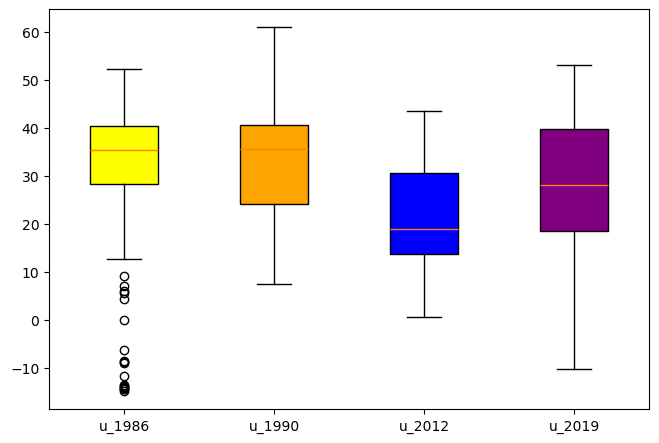

In [12]:
# Creating plot
data_plot = [u_1986, u_1990, u_2012, u_2019]
fig = plt.figure(figsize =(6, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data_plot, patch_artist = True)


colors = ['yellow', 'orange', 'blue', 'purple']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x-axis labels
ax.set_xticklabels(['u_1986', 'u_1990', 'u_2012', 'u_2019'])

# show plot
plt.show()

### HW2 3c

In [13]:
DIR = '/nfs/spare11/env315/data/'
filename = 'era5_an_uwind_reg2_daily_2021.nc'
datafile = DIR+filename
data = xr.open_mfdataset(datafile,combine='by_coords').compute()
data = data.var131

In [14]:
data = np.squeeze(data.sel(lon=260,lat=slice(90,0),time='2021-02-12'))
data

<xarray.DataArray 'var131' (plev: 37, lat: 46)> Size: 7kB
array([[ 9.0001068e+00, -1.7222549e+01, -1.4860245e+01, ...,
        -1.0776260e+01, -1.1221573e+01, -1.1818253e+01],
       [ 5.1473007e+00, -1.8911293e+01, -1.6355629e+01, ...,
        -3.6321449e+01, -3.8331215e+01, -4.0402504e+01],
       [ 4.8928070e-01, -1.8539040e+01, -1.6160133e+01, ...,
        -4.0655251e+01, -4.3950172e+01, -4.5856422e+01],
       ...,
       [-7.2542114e+00,  9.9362183e+00,  5.2980347e+00, ...,
        -3.0637817e+00, -5.8306885e-01, -1.3458252e-01],
       [-7.9212914e+00,  9.0286598e+00,  5.3331032e+00, ...,
        -2.9190941e+00, -2.4966049e-01, -1.2636948e-01],
       [-8.2575493e+00,  8.9389839e+00,  5.2265816e+00, ...,
        -2.7770805e+00, -1.8430710e-01, -6.5727234e-03]], dtype=float32)
Coordinates:
  * lat      (lat) float64 368B 90.0 88.0 86.0 84.0 82.0 ... 8.0 6.0 4.0 2.0 0.0
    lon      float64 8B 260.0
  * plev     (plev) float64 296B 100.0 200.0 300.0 ... 9.5e+04 9.75e+04 1e+05
    time     datetime64[ns] 8B 2021-02-12T09:00:00
Attributes:
    table:         128
    cell_methods:  time: mean

/tmp/ipykernel_1385521/112348284.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabel)


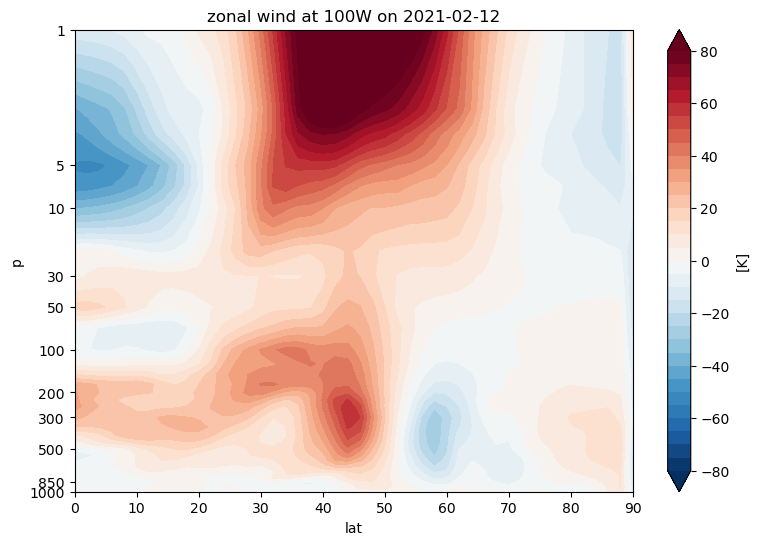

In [16]:
figure = plt.figure(figsize=(9,6))
ax = figure.add_subplot(1,1,1)
h = ax.contourf(data.lat.values,data.plev.values/100,data, levels=np.arange(-80,85,5), cmap='RdBu_r', extend='both')
ax.set_title('zonal wind at 100W on 2021-02-12', fontsize=12)
plt.xlabel("lat")
plt.ylabel("p")
# Adjust the y-axis to be logarithmic
ylabel = np.array([1000,850,500,300,200])
ylabel = np.concatenate([ylabel,np.array([100,50,30])])
ylabel = np.concatenate([ylabel,np.array([10,5,1])])
ax.set_yscale('symlog')
ax.set_yticklabels(ylabel)
ax.set_ylim([1000,1])
ax.set_yticks(ylabel)

# define your own colorbar feature
cbar = plt.colorbar(h, orientation='vertical',pad=0.05)
cbar.ax.tick_params(labelsize=10) 
colorLabel='[K]'
cbar.set_label(label=colorLabel,fontsize=10)
plt.show() 